In [843]:
# import import_ipynb
# from SaMM_simulator import *

In [844]:
import collections
import colorama
from colorama import Fore
from texttable import Texttable
import random, string

In [845]:
processes = []

In [846]:
class SaMM():
    
    def __init__(self, memory_size, processes):
        self.memory = [0 for i in range(memory_size)]
        self.free_mem = [[0,len(self.memory)-1]]
        self.allocated_memory = dict()
        self.processes =processes.copy()

    def allocate_process(self,p):
        temp =[]
        flag = False
        name = p[0]
        process_len = p[1]
        for fm in self.free_mem:
            if (fm[1]-fm[0]+1)>= process_len:
                self.allocated_memory[name] = (fm[0],fm[0]+process_len-1)
                for s in range(fm[0],fm[0]+process_len):
                    self.memory[s]=name
                if (fm[1]-fm[0]+1)==process_len:
                    temp.append(fm)
                    flag = True
                    break
                fm[0]=fm[0]+process_len
                flag = True
                break
                
#         for i in temp:
#             self.free_mem.remove(i) 
        
        if flag:
            return True
        return False
    
    def process_allocation(self):
        temp=[]
        process_count = len(self.processes)
        for process in self.processes:
            if self.allocate_process(process):
                temp.append(process)
        for i in temp:
            self.processes.remove(i)

        #print=============    
        print(len(temp)," process(es) out of ",process_count," are allocated into the memory successfully\n")
        print("Current process queue:")
        if len(self.processes)==0:
            print("Process queue is empty (All processes are allocated)")
        else:
            for process in self.processes:
                print(process, end=" ")
        print("\n")
        #==================
        
    def get_memory_status(self):
        print("Current process queue:")
        if len(self.processes)==0:
            print("Process queue is empty (All processes are allocated)")
        else:
            for process in self.processes:
                print(process, end=" ")
        print("\n")
        
        print("Memory:")
        print("|", end="")
        for i in self.memory:
            print(i,"|",end="")
        print("\n")

        print("Allocated memory: ")
        print("Process ID\t","Start index\t","End index\t","Size")
        for p in self.allocated_memory:
            size = self.allocated_memory[p][1]-self.allocated_memory[p][0]+1
            print(p,"\t\t",self.allocated_memory[p][0],"\t\t",self.allocated_memory[p][1],"\t\t",size,"K")
        print("\n")

        print("Free memory: ")
        print("Start index\t","End index")
        for fm in self.free_mem:
            size = fm[1]-fm[0]+1
            print(fm[0],"\t\t",fm[1],"\t\t",size,"K")
    
    
    def deallocate_process(self,p):
        if self.allocated_memory.get(p):
            start, end = self.allocated_memory[p]
            for i,fm in enumerate(self.free_mem):
                if end <= fm[0]:
                    self.free_mem.insert(i,[start, end])
                    break
            for i in range(start,end+1):
                self.memory[i]=0     
            del self.allocated_memory[p]
            self.adjust_free_memory()
            print("Process: ",p," is deallocated successfully")
        else:
            print("Process: ",p," does not exist")

    
    def adjust_free_memory(self):
        temp = []
        if len(self.free_mem)>1:
            prev_start,prev_end = self.free_mem[0]
            for fm in range(1,len(self.free_mem)):
                if self.free_mem[fm][0]-1 == prev_end:
                    temp.append(self.free_mem[fm-1])
                    self.free_mem[fm][0]=prev_start
                prev_start = self.free_mem[fm][0]
                prev_end = self.free_mem[fm][1]
        for i in temp:
            self.free_mem.remove(i)
        
    
    def shift_memory(self,strt_idx, no_ele, shft_idx):
        for i in range(no_ele):
            self.memory[strt_idx+i], self.memory[shft_idx+i] = self.memory[shft_idx+i], self.memory[strt_idx+i]

        
    def defragment(self):
        fm_start,fm_end = self.free_mem[0]
        for p in self.allocated_memory:
            p_start, p_end = self.allocated_memory[p]
            p_len = p_end - p_start + 1
            if p_start-1 > 0 and self.memory[p_start-1]==0:
                self.shift_memory(p_start, p_len, fm_start)
                self.allocated_memory[p] = (fm_start, fm_start + p_len - 1)
                fm_start = fm_start + p_len
        self.free_mem.clear()
        self.free_mem.append([fm_start,len(self.memory)-1])   
        
        print("Defragmentation is performed successfully...!\n")
        print("Continuous free space created: ",len(self.memory)-fm_start+1)
    

In [847]:
class SaMM_performance(SaMM):
    def __init__(self, memory_size, processes):
        super().__init__(memory_size, processes)
    
    def total_free_memory(self):
        total = 0
        for fm in self.free_mem:
            total += fm[1]-fm[0]+1
        return total
        
    def mem_allocation_defrag(self):
        temp=[]
        process_count = len(self.processes)
        for process in self.processes:
            if self.allocate_process(process):
                temp.append(process)
            elif self.total_free_memory() >= process[1]:
                self.defragment()
                if self.allocate_process(process):
                    temp.append(process)
        for i in temp:
            self.processes.remove(i)

        #print=============    
        print(len(temp)," process(es) out of ",process_count," are allocated into the memory successfully\n")
        print("Current process queue:")
        if len(self.processes)==0:
            print("Process queue is empty (All processes are allocated)")
        else:
            for process in self.processes:
                print(process, end=" ")
        print("\n")
        #==================
    

In [848]:
def input_processes(n):  

    PID_exist =set()

    def generate_process():
        # generate random process ID
        PID=random.randint(1000,9999)
        PID = "P"+str(PID)
        while PID in PID_exist:
            PID=random.randint(1000,9999)
            PID = "P"+str(PID)
        PID_exist.add(PID)
        # generate random process length
        PLEN=random.randint(4,30)
        return PID,PLEN
    
    for i in range(n):
        PID,PLEN =generate_process()
        processes.append((PID,PLEN))
        
    print("New created processes:")
    print("Process ID\t","Process length")
    for p in processes:
        print(p[0],"\t\t",p[1])

In [849]:
N=5

In [850]:
input_processes(100)

New created processes:
Process ID	 Process length
P5457 		 23
P4459 		 21
P1703 		 8
P6573 		 29
P4786 		 28
P8387 		 26
P9891 		 14
P9912 		 4
P6450 		 10
P9192 		 11
P6655 		 7
P7518 		 23
P4688 		 24
P8779 		 28
P4863 		 17
P7949 		 6
P6383 		 10
P3591 		 8
P1004 		 21
P6561 		 23
P9075 		 26
P5548 		 5
P5556 		 4
P6735 		 20
P1763 		 11
P3127 		 25
P9080 		 23
P4458 		 4
P6796 		 19
P3321 		 21
P5782 		 9
P3582 		 4
P2460 		 26
P1844 		 28
P8672 		 8
P7282 		 24
P5173 		 26
P9445 		 30
P4139 		 18
P7380 		 26
P7957 		 20
P5380 		 9
P2559 		 10
P2617 		 27
P8854 		 5
P1968 		 17
P2504 		 11
P2335 		 29
P7209 		 28
P3714 		 8
P3339 		 10
P5742 		 18
P9796 		 12
P9451 		 28
P3770 		 21
P2483 		 8
P5381 		 22
P7133 		 30
P9393 		 29
P7832 		 24
P8441 		 14
P3868 		 16
P2022 		 12
P9699 		 21
P3683 		 20
P9233 		 12
P9810 		 6
P7270 		 25
P3921 		 15
P9251 		 17
P3914 		 12
P9421 		 7
P5550 		 19
P4901 		 21
P2347 		 29
P5988 		 18
P8918 		 12
P6005 		 17
P8722 		 23
P8784 		 20
P5179 	

## 1. without defragmentation

In [851]:
without_defrag = SaMM_performance(128, processes)

In [852]:
without_defrag.get_memory_status()

Current process queue:
('P5457', 23) ('P4459', 21) ('P1703', 8) ('P6573', 29) ('P4786', 28) ('P8387', 26) ('P9891', 14) ('P9912', 4) ('P6450', 10) ('P9192', 11) ('P6655', 7) ('P7518', 23) ('P4688', 24) ('P8779', 28) ('P4863', 17) ('P7949', 6) ('P6383', 10) ('P3591', 8) ('P1004', 21) ('P6561', 23) ('P9075', 26) ('P5548', 5) ('P5556', 4) ('P6735', 20) ('P1763', 11) ('P3127', 25) ('P9080', 23) ('P4458', 4) ('P6796', 19) ('P3321', 21) ('P5782', 9) ('P3582', 4) ('P2460', 26) ('P1844', 28) ('P8672', 8) ('P7282', 24) ('P5173', 26) ('P9445', 30) ('P4139', 18) ('P7380', 26) ('P7957', 20) ('P5380', 9) ('P2559', 10) ('P2617', 27) ('P8854', 5) ('P1968', 17) ('P2504', 11) ('P2335', 29) ('P7209', 28) ('P3714', 8) ('P3339', 10) ('P5742', 18) ('P9796', 12) ('P9451', 28) ('P3770', 21) ('P2483', 8) ('P5381', 22) ('P7133', 30) ('P9393', 29) ('P7832', 24) ('P8441', 14) ('P3868', 16) ('P2022', 12) ('P9699', 21) ('P3683', 20) ('P9233', 12) ('P9810', 6) ('P7270', 25) ('P3921', 15) ('P9251', 17) ('P3914', 12)

In [853]:
iterations_without_defrag=1
without_defrag.process_allocation()
while without_defrag.processes:
    iterations_without_defrag+=1
    
    
    
    for i in range(N): # deallocating N random process from the memory
        if not without_defrag.allocated_memory:
            break
        p = random.randint(0,len(without_defrag.allocated_memory)-1)
        without_defrag.deallocate_process(list(without_defrag.allocated_memory.keys())[p])
        
    without_defrag.process_allocation()

7  process(es) out of  100  are allocated into the memory successfully

Current process queue:
('P8387', 26) ('P6450', 10) ('P9192', 11) ('P6655', 7) ('P7518', 23) ('P4688', 24) ('P8779', 28) ('P4863', 17) ('P7949', 6) ('P6383', 10) ('P3591', 8) ('P1004', 21) ('P6561', 23) ('P9075', 26) ('P5548', 5) ('P5556', 4) ('P6735', 20) ('P1763', 11) ('P3127', 25) ('P9080', 23) ('P4458', 4) ('P6796', 19) ('P3321', 21) ('P5782', 9) ('P3582', 4) ('P2460', 26) ('P1844', 28) ('P8672', 8) ('P7282', 24) ('P5173', 26) ('P9445', 30) ('P4139', 18) ('P7380', 26) ('P7957', 20) ('P5380', 9) ('P2559', 10) ('P2617', 27) ('P8854', 5) ('P1968', 17) ('P2504', 11) ('P2335', 29) ('P7209', 28) ('P3714', 8) ('P3339', 10) ('P5742', 18) ('P9796', 12) ('P9451', 28) ('P3770', 21) ('P2483', 8) ('P5381', 22) ('P7133', 30) ('P9393', 29) ('P7832', 24) ('P8441', 14) ('P3868', 16) ('P2022', 12) ('P9699', 21) ('P3683', 20) ('P9233', 12) ('P9810', 6) ('P7270', 25) ('P3921', 15) ('P9251', 17) ('P3914', 12) ('P9421', 7) ('P5550', 

In [854]:
print(iterations_without_defrag)

20


## 2. With defragmetation

In [855]:
with_defrag = SaMM_performance(128, processes)

In [856]:
with_defrag.get_memory_status()

Current process queue:
('P5457', 23) ('P4459', 21) ('P1703', 8) ('P6573', 29) ('P4786', 28) ('P8387', 26) ('P9891', 14) ('P9912', 4) ('P6450', 10) ('P9192', 11) ('P6655', 7) ('P7518', 23) ('P4688', 24) ('P8779', 28) ('P4863', 17) ('P7949', 6) ('P6383', 10) ('P3591', 8) ('P1004', 21) ('P6561', 23) ('P9075', 26) ('P5548', 5) ('P5556', 4) ('P6735', 20) ('P1763', 11) ('P3127', 25) ('P9080', 23) ('P4458', 4) ('P6796', 19) ('P3321', 21) ('P5782', 9) ('P3582', 4) ('P2460', 26) ('P1844', 28) ('P8672', 8) ('P7282', 24) ('P5173', 26) ('P9445', 30) ('P4139', 18) ('P7380', 26) ('P7957', 20) ('P5380', 9) ('P2559', 10) ('P2617', 27) ('P8854', 5) ('P1968', 17) ('P2504', 11) ('P2335', 29) ('P7209', 28) ('P3714', 8) ('P3339', 10) ('P5742', 18) ('P9796', 12) ('P9451', 28) ('P3770', 21) ('P2483', 8) ('P5381', 22) ('P7133', 30) ('P9393', 29) ('P7832', 24) ('P8441', 14) ('P3868', 16) ('P2022', 12) ('P9699', 21) ('P3683', 20) ('P9233', 12) ('P9810', 6) ('P7270', 25) ('P3921', 15) ('P9251', 17) ('P3914', 12)

In [857]:
iterations_with_defrag=1
with_defrag.mem_allocation_defrag()
while with_defrag.processes:
    iterations_with_defrag+=1
    
    with_defrag.get_memory_status()
    
    for i in range(N): # deallocating N random process from the memory
        if not with_defrag.allocated_memory:
            break
        p = random.randint(0,len(with_defrag.allocated_memory)-1)
        with_defrag.deallocate_process(list(with_defrag.allocated_memory.keys())[p])
    with_defrag.mem_allocation_defrag()

7  process(es) out of  100  are allocated into the memory successfully

Current process queue:
('P8387', 26) ('P6450', 10) ('P9192', 11) ('P6655', 7) ('P7518', 23) ('P4688', 24) ('P8779', 28) ('P4863', 17) ('P7949', 6) ('P6383', 10) ('P3591', 8) ('P1004', 21) ('P6561', 23) ('P9075', 26) ('P5548', 5) ('P5556', 4) ('P6735', 20) ('P1763', 11) ('P3127', 25) ('P9080', 23) ('P4458', 4) ('P6796', 19) ('P3321', 21) ('P5782', 9) ('P3582', 4) ('P2460', 26) ('P1844', 28) ('P8672', 8) ('P7282', 24) ('P5173', 26) ('P9445', 30) ('P4139', 18) ('P7380', 26) ('P7957', 20) ('P5380', 9) ('P2559', 10) ('P2617', 27) ('P8854', 5) ('P1968', 17) ('P2504', 11) ('P2335', 29) ('P7209', 28) ('P3714', 8) ('P3339', 10) ('P5742', 18) ('P9796', 12) ('P9451', 28) ('P3770', 21) ('P2483', 8) ('P5381', 22) ('P7133', 30) ('P9393', 29) ('P7832', 24) ('P8441', 14) ('P3868', 16) ('P2022', 12) ('P9699', 21) ('P3683', 20) ('P9233', 12) ('P9810', 6) ('P7270', 25) ('P3921', 15) ('P9251', 17) ('P3914', 12) ('P9421', 7) ('P5550', 

|P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P8387 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P1004 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P8779 |P7949 |P7949 |P7949 |P7949 |P7949 |P7949 |P3591 |P3591 |P3591 |P3591 |P3591 |P3591 |P3591 |P3591 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P6561 |P1763 |P1763 |P1763 |P1763 |P1763 |P1763 |P1763 |P1763 |P1763 |P1763 |P1763 |P4458 |P4458 |P4458 |P4458 |P5548 |

Allocated memory: 
Process ID	 Start index	 End index	 Size
P8387 		 0 		 25 		 26 K
P8779 		 47 		 7

|P4139 |P4139 |P4139 |P4139 |P4139 |P4139 |P4139 |P4139 |P4139 |P4139 |P4139 |P4139 |P4139 |P7380 |P7380 |P7380 |P7380 |P7380 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P9445 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P1968 |P2504 |P2504 |P2504 |P2504 |P2504 |P2504 |P2504 |P2504 |P2504 |P2504 |P2504 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P2335 |P3714 |P3714 |P3714 |P3714 |P3714 |P3714 |P3714 |P3714 |P3339 |P3339 |P3339 |P3339 |P3339 |P3339 |P3339 |P3339 |P3339 |P3339 |P8854 |P8854 |P8854 |0 |0 |

Allocated memory: 
Process ID	 Start index	 End index	 Size
P5548 		 0 		 4 		 5 K
P9080 		 26 		 48 		 23 K


IndexError: list index out of range

In [858]:
print(iterations_with_defrag)

9


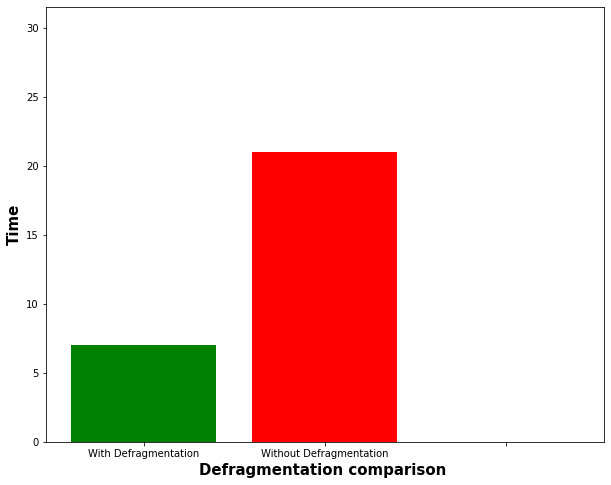

In [859]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
# height = [Time_with_defrag, Time_without_defrag]
fig = plt.subplots(figsize =(10, 8))

height = [Time_with_defrag,Time_without_defrag,30]
bars = ('With Defragmentation','Without Defragmentation','')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['green','red','white'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

plt.xlabel('Defragmentation comparison ', fontweight ='bold', fontsize = 15)
plt.ylabel('Time', fontweight ='bold', fontsize = 15)

# Show graph
plt.show()